
## Reinforcement Learning in Options Hedging 


$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### Abstract

In recent years, with the development of artificial intelligence, reinforcement learning, an algorithm that learns the optimal strategy with statistical method from data, has gained people's attention. In this project, we try to use reinforcement learning algorithms to construct a strategy to reduce the risk of selling call options. Our contributions can be summarized as follows:

- An environment based on geometric Brownian motion and BSM pricing formula is implemented, which can be used for the research of reinforcement learning algorithms’ applications in option trading.
- A reinforcement learning model is designed and trained, and the expected account value is better than that of delta hedging.
- Based on the experimental results and other existed studies, the possibilities of further improvements of the experiment are discussed, and the exploration direction of applying reinforcement learning to financial market is proposed.

### Table of content
- Introduction
    * Delta Hedging
    * Reinforcement Learning
- Toolkits
    * Introduction to Gym
    * Introduction to Spinning Up
    * Installation
- Our Settings
    * Learning Algorithms 
    * Models
    * Formulation of The Problem
    * Implementation of Environments
- Experiment
    * Parameters of Environments
    * Training
    * Evaluation
- Conclusion and Discussions
- References

### Introduction

#### Reinforcement Learning
* Reinforcement learning considers the situation where a series of decisions have to be made in a stochastically changing environment. At the time of each decision, there are a number of states and a number of possible actions. The set up is illustrated in the following figure.

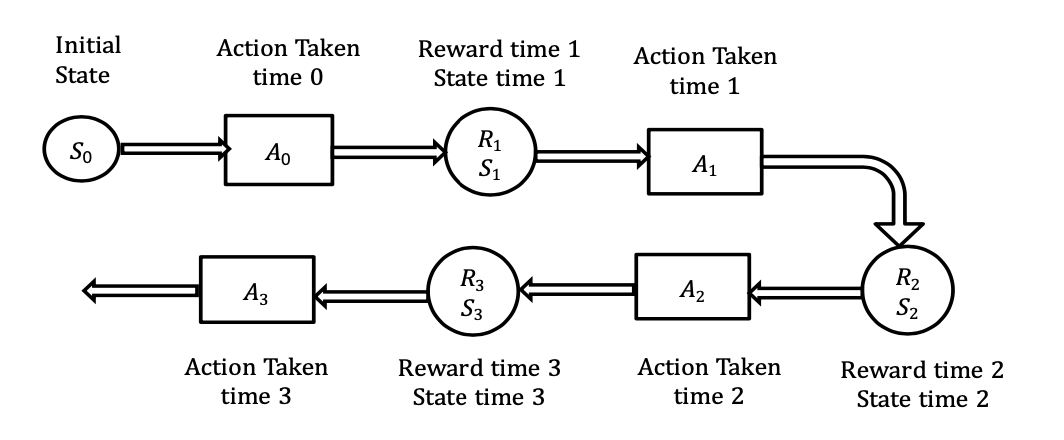

In [1]:
from IPython.display import Image
PATH = "image.png"
Image(filename = PATH)

* The decision maker takes an action, $A_0$, at time zero when the state $S_0$ is known. This results in a reward, $R_1$, at time $1$ and a new state, $S_1$, is then encountered. The decision maker then takes another action, $A_1$ which results in a reward, $R_2$ at time $2$ and a new state, $S_2$; and so on.
* The aim of reinforcement learning is to maximize expected future rewards. Specifically, it attempts to maximize the expected value of $G_t$ where

$$
G_t =R_{t+1} + γR_{t+2} +γ^2R_{t+3} +···+γ^{T−1}R_T
$$

* $T$ is a horizon date and $γ ∈ (0, 1]$ is a discount factor. To ensure the equation above reflects the time value of money, we define $R_t$ as the the cash flow received at time $t$ multiplied by $γ$ (i.e., discounted by one period).
* In order to maximize $G_t$ in equation, the decision maker needs a set of rules for what action to take in any given state. This set of rules is represented by a policy function $π : S → A$, where $S$ and $A$ are the sets of all possible states and actions, respectively. If the decision maker uses policy $π$ and is in state $S_t$ at time $t$, then the action taken is $A_t = π(S_t)$. The policy is updated as the reinforcement learning algorithm progresses. As we explain later, learning an optimal policy involves both exploration and exploitation. For example, at a particular stage in the execution of the reinforcement learning algorithm, the policy might involve, for all states and all times, a 90% chance of taking the best action identified so far (exploitation) and a 10% chance of randomly selecting a different action (exploration).
* For a specific policy $π$, we define the value of taking action $A_t$ in a state $S_t$ as the expected total reward (discounted) starting from state $S_t$ taking action $A_t$ and taking the actions given by the policy in the future states that are encountered. The value of each state-action pair is represented by a function $Q : S × A → \mathbb R$, referred to as the action-value function or Q-function:
$$
Q(S_t, A_t) = \E(G_t|S_t, A_t)
$$
* The Q-function is estimated from a large number of state and action sequences similar to the one depicted in the figure above. These are referred to as episodes and are generated from either historical or simulated data. If the decision maker has a good estimate of the value of each action for any state possibly encountered, then she has an effective way of comparing policies. Reinforcement learning methods provide a way of determining the decision maker’s policy as data from episodes are accumulated.

#### Delta Hedging
* Traders have traditionally hedged the risks associated with derivatives transactions using what are referred to as “Greek letters.” Delta is the most important Greek letter. It is the partial derivative of the value of a transaction with respect to the underlying asset price. Traders typically try to maintain delta-neutral positions. 
* Because the delta of an option changes during its life, the trader’s position must be rebalanced periodically. If there are no transaction costs or other fric- tions, it is in theory optimal to rebalance continuously. If the underlying asset price follows the assumed process, continuous rebalancing will lead to the cost of hedging the option equaling its theoretical price. In practice, transaction costs and other frictions mean that the theoretically optimal strategy must be modified. The position in the underlying asset is rebalanced periodically rather than continuously.
* In this project, we illustrates the reinforcement learning approach by examining how a trader should take trading costs into account when using the underlying asset for hedging.

### Toolkits
#### Gym
The following reference is from the official website of gym: http://gym.openai.com
- ' Gym is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.'
-----------
We use gym to implement our own environment. The environment code is enclosed in our project package, yet we still need to complete the following installation to be consistent with the style of gym, rather than simply define the functions in the jupyter notebook.

#### Spinning up
The following reference is from the official website of spinning up: https://spinningup.openai.com
- '...So our package here is designed to serve as the missing middle step for people who are excited by deep RL, and would like to learn how to use it or make a contribution, but don’t have a clear sense of what to study or how to transmute algorithms into code. We’ve tried to make this as helpful a launching point as possible.'
----------------------
We use spinning up to implement our algorithms, but we have modified the original code for the purpose of this project. We have enclosed our adapted version of spinning up in the work dir.

#### Installation
The installation of spinning up may take some time because it has many related packages to be installed. **If you don't want to train the model yourself, you can just run our pretrained test code.** In that case, all you need to have are gym and Pytorch (no spinning up required).

Please set up the environment as instructed:

1. Gym, Pytorch and our own environment must be installed

In [2]:
!pip3 install -e gym

Obtaining file:///Users/sebastianjiang/Downloads/NSD_FinalProject_JiangTeng_CuiDefang_WangYizhou/gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.2
    Uninstalling gym-0.17.2:
      Successfully uninstalled gym-0.17.2
  Running setup.py develop for gym


In [3]:
!pip3 install -e DHENV

Obtaining file:///Users/sebastianjiang/Downloads/NSD_FinalProject_JiangTeng_CuiDefang_WangYizhou/DHENV
  Attempting uninstall: DHENV
    Found existing installation: DHENV 0.0.1
    Uninstalling DHENV-0.0.1:
      Successfully uninstalled DHENV-0.0.1
  Running setup.py develop for DHENV


In [4]:
!pip3 install torch

2. For spinup (**optional**):

In [54]:
!pip3 install -e spinningup-master

# You do not have to run this cell. We have already trained the model and saved it in our folder.

Obtaining file:///Users/emperial/Desktop/%E7%A7%91%E7%A0%94/%E6%9A%91%E6%9C%9F%E5%AD%A6%E6%A0%A1/RL_Hedging/%E5%A4%A7%E4%BD%9C%E4%B8%9A/spinningup-master
Processing /Users/emperial/Library/Caches/pip/wheels/be/72/05/d3dfcfc2a31bbf886112b6373881bdf2e9e00d2c943f3b4f91/gym-0.15.7-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.17.2
    Uninstalling gym-0.17.2:
      Successfully uninstalled gym-0.17.2
  Attempting uninstall: spinup
    Found existing installation: spinup 0.2.0
    Uninstalling spinup-0.2.0:
      Successfully uninstalled spinup-0.2.0
  Running setup.py develop for spinup


If you don't want to install spinup, it's OK -- Just use our pretrained model.

### Our Setting

#### Learning Algorithms

The learning algorithm we choose is Deep Deterministic Policy Gradient (DDPG), which is an algorithm that concurrently learns a Q-function and a policy. It uses off-policy data (data in the memory) and the Bellman equation to learn the Q-function, and uses the Q-function to learn the policy.
    
This approach is closely connected to Q-learning, and is motivated the same way: if you know the optimal action-value function $Q^*(s,a)$, then in any given state, the optimal action $a^*(s)$ can be found by solving$$a^*(s) = \arg \max_a Q^*(s,a).$$

The key difference between DDPG and other Q-learning like Deep Q-learning (DQN) is that DDPG interleaves learning an approximator to $Q^*(s,a)$ with learning an approximator to $a^*(s)$, and it does so in a way which is specifically adapted for environments with continuous action spaces.

In other Q-learning algorithms, the agent usually needs to carry out the computation of the max over actions in $\max_a Q^*(s,a)$. When there are a finite number of discrete actions, the max poses no problem, because we can just compute the Q-values for each action separately and directly compare them. For example, the DQN will maintain a network with Q-values for different actions given the state as a output. (This also immediately gives us the action which maximizes the Q-value.) But when the action space is continuous, we can’t exhaustively evaluate the space, and solving the optimization problem is highly non-trivial. Using a normal optimization algorithm would make calculating $\max_a Q^*(s,a)$ a painfully expensive subroutine. And since it would need to be run every time the agent wants to take an action in the environment, this is unacceptable. But in the DDPG, we have an approximator $a^*(s)$ to directly calculate the action which can give the maximal Q-value even from a continuous action space.

DDPG also have other two tricks to accelerate the learning algorithm convergence.

Trick One: Replay Buffers. All standard algorithms for training a deep neural network to approximate $Q^*(s,a)$ make use of an experience replay buffer. This is the set $\mathcal D$ of previous experiences. In order for the algorithm to have stable behavior, the replay buffer should be large enough to contain a wide range of experiences, but it may not always be good to keep everything. If you only use the very-most recent data, you will overfit to that and things will break; if you use too much experience, you may slow down your learning. This may take some tuning to get right.

Trick Two: Target Networks. Q-learning algorithms make use of target networks. The term

$$r + \gamma (1 - d) \max_{a'} Q_{\phi}(s',a')$$

is called the target, because when we minimize the MSBE loss, we are trying to make the Q-function be more like this target. Problematically, the target depends on the same parameters we are trying to train: $\phi$. This makes MSBE minimization unstable. The solution is to use a set of parameters which comes close to $\phi$, but with a time delay—that is to say, a second network, called the target network, which lags the first. The parameters of the target network are denoted $\phi_{\text{targ}}$.

In DQN-based algorithms, the target network is just copied over from the main network every some-fixed-number of steps. In DDPG-style algorithms, the target network is updated once per main network update by polyak averaging:

$$\phi_{\text{targ}} \leftarrow \rho \phi_{\text{targ}} + (1 - \rho) \phi,$$

where $\rho$ is a hyperparameter between 0 and 1 (usually close to 1). (This hyperparameter is called `polyak` in our code).

In conclusion, we provide a pseudocode there for you to read.
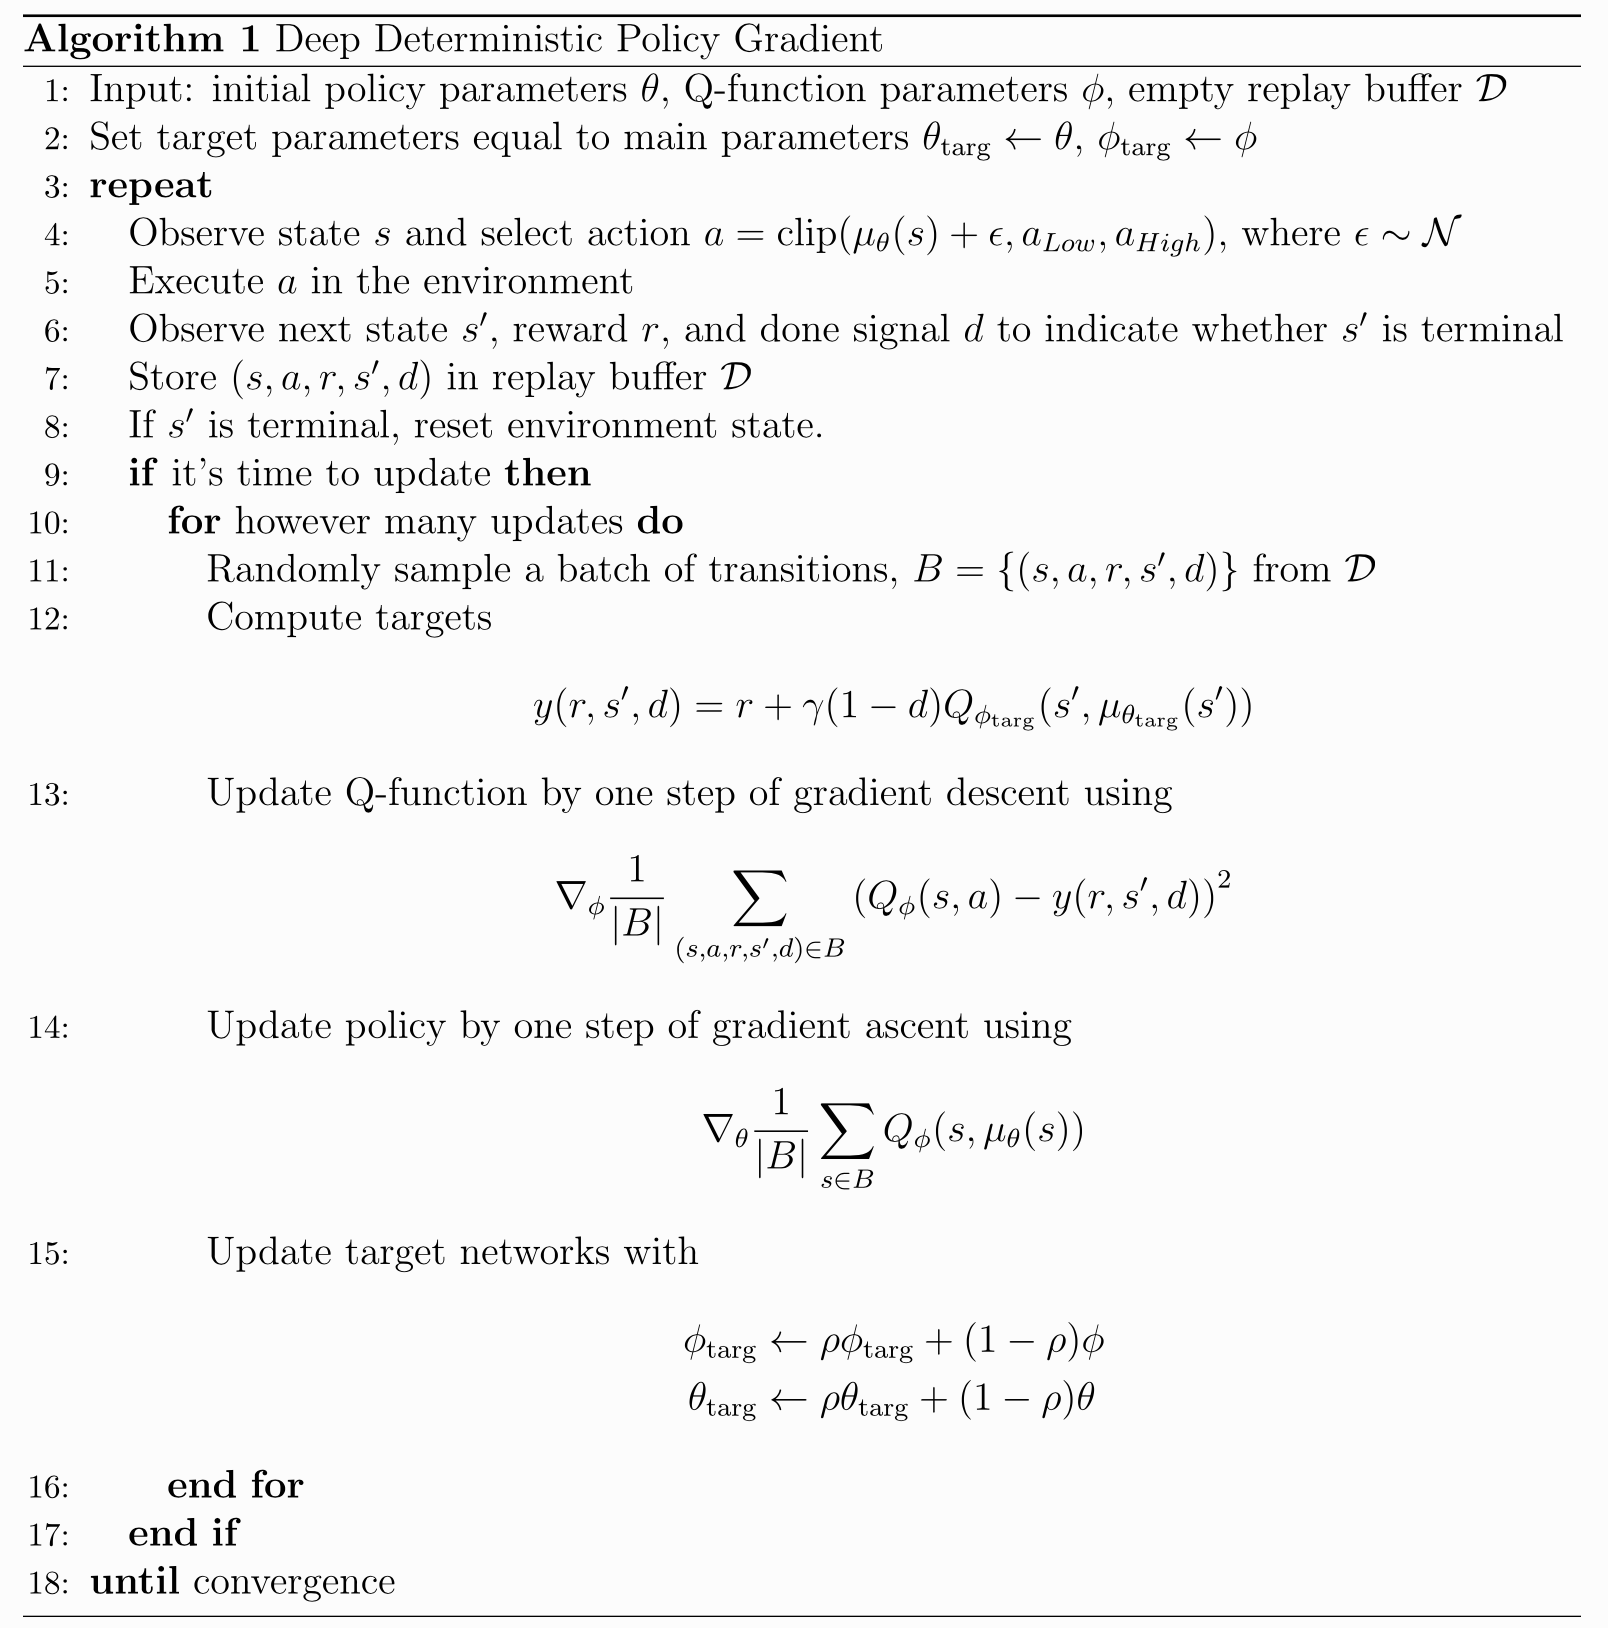

#### Models
Because DDPG is chosen to be our algorithm, we need to model two functions. 
- The first function is the Q function, which is to map the action and state into the revenue;
- The second is the P function, which is to map the state to the action. 
* Specifically, we choose multiple perceptrons, the simplest deep learning network, to be our modeling function. On the number of layers, we choose 4 (stock number, account deposit, stock price, maturity time) or 5 (plus actions) --> 80--> 40 --> 1, and add leakyrelu activation layer in the middle. **In particular, we add a tanh function at the end of P function. We will talk about its importance below.** The code is as follows: 

In [5]:
import torch
import torch.nn as nn
import numpy as np
class HEDGING_Actor(nn.Module):

    def __init__(self, obs_dim, act_dim, act_limit):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim, 80)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(256, 128)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(80, 40)
        self.ac3 = nn.LeakyReLU(0.1)
        self.fc4 = nn.Linear(40, act_dim)
        self.th = nn.Tanh()

    def forward(self, obs):
        # Return output from network scaled to action space limits.
        c = obs.numpy()
        if np.isnan(c).any():
            print('nan')
            exit()
        for item in c:
            try:
                for it in item:
                    if np.inf == abs(it):
                        print('inf')
                        print(c)
                        exit()
            except:
                 if np.inf == abs(item):
                     print('inf')
                     print(c)
                     exit()
        x = self.fc1(obs)
        x = self.ac1(x)
        '''
        x = self.fc2(x)
        x = self.ac2(x)
        '''
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        d = x.detach().numpy()
        if np.isnan(d).any():
            print('nan')
            exit()
        #x = torch.clamp(x, min = -5, max = 10)
        return self.th(x)

class HEDGING_QFunction(nn.Module):

    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim + act_dim, 80)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(256, 128)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(80, 40)
        self.ac3 = nn.LeakyReLU(0.1)
        self.fc4 = nn.Linear(40, act_dim)

    def forward(self, obs, act):
        x = self.fc1(torch.cat([obs, act], dim=-1))
        x = self.ac1(x)
        '''
        x = self.fc2(x)
        x = self.ac2(x)
        '''
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return torch.squeeze(x, -1) # Critical to ensure q has right shape.

class HEDGING(nn.Module):

    def __init__(self, observation_space, action_space,activation=nn.ReLU):
        super().__init__()

        obs_dim = observation_space.shape[0]
        act_dim = action_space.shape[0]
        act_limit = action_space.high[0]

        # build policy and value functions
        self.pi = HEDGING_Actor(obs_dim, act_dim, act_limit)
        self.q = HEDGING_QFunction(obs_dim, act_dim)

    def act(self, obs):
        with torch.no_grad():
            return self.pi(obs).numpy()

The reasons why the model is like this is as below:
- The number of layers of the model and the number of neurons: These are the results of experiment evaluated by convergence and rewards. In the code, you can see some traces of experiments that have not been deleted. Of course, due to the limitation of time, we did not make a more detailed parameter adjustment. 
- The $tanh$ function: This function aims to solve the problem of the infinite action and reward. The range of the function tanh is from - 1 to 1, which makes the range of action very stable. If the tanh function is not added, it is easy to encounter infinity in the calculation, which will cause $NaN$ to appear in the training parameters.
- Why $tanh$ but not other functions: Your next question might be why we didn't use other methods to solve the problem above. For example, suppose the action is forced to be limited to a certain range: This method could potentially prevent the function from gradient descent. Intuitively, you can consider this case to clear this puzzle: Suppose the output value is 10000, However, we limit the action to - 5 to 5. In this interval, the gradient around 10000 is 0, because whether we change 10000 into 9000 or 11000, the final benefit is the benefit with action of 5 -- This is not acceptable in our consideration. Compared with the activation function of $sigmoid$, the range of $sigmoid$ is 0 to 1, whereas $tanh$ is from - 1 to + 1, which is more suitable for the problems with both positive and negative.

#### Formulation of The Problem

In this section, we will choose the *state space*, *action space*, *reward function* to formulize the option hedging problem we studied (a trader is hedging a short position in a call option) in a standard Reinforcement Learning Problem.

We assume that the trader rebalances her position at time intervals of $\Delta t$ and is subject to trading costs. Thus, the *action space* of each states is $\mathbb R$, which means an adjustment of the previous stock position. Besides, we force the agent to liquidize all stock position at the maturity of the call option.

The life of the option is $n\Delta t$. The cost of a trade in the underlying asset in our formulation is proportional to the value of what is being bought or sold, but the analysis can easily be adjusted to accommodate other assumptions. The state at time $i\Delta t$ is defined by three parameters:

1. The holding of the asset during the previous time period; i.e., from time $(i − 1)\Delta t$ to time $i \Delta t$
2. The asset price at time $i \Delta t$
3. The time to maturity.

There are two kinds of reward functions can be used: PnL and cashflow. Both of them have strong finance and economics meaning. It makes sense to apply them as the reward function of the RL problem. The PnL can be viewd as a change of the total asset account. The cashflow can be viewed as a change of money account. Both of their details can be looked in the next section's code.

#### The Implementation of Environments

We define three types of environments to interact with our Reinforcement Learning agents. The typical settings of these environments are same. The difference between them is the reward functions (and in one environment we set the agent to act as a delta hedging trader to provide a benchmark to our methods.)

As the saying goes, `Talk is cheap, show me the code`. In this section I will directly show you the implementation of our environments using annotation to explain the code. **You cannot run it in this cell.** But you have already got well prepared in our previous section of installation.

The implementation of environment with PnL as the reward function is as follows:
```
class GBM_simple_PL_cdf(gym.Env):
    
    def __init__(self, std = 0.3, mean = 0.2, T = 100, S = 10, strike = 8, riskfree = 0.01, dividen = 0, deltat = 0.001, transac = 0.01):
        self.std = std  # The coefficient of standard BM in the GMB.
        self.mean = mean  # The drift coefficient.
        self.maturity = T * deltat  # T means number of steps. deltat means dt.
        self.maturity_const = T * deltat
        self.strike = strike
        self.riskfree = riskfree
        self.dividen = dividen
        self.deltat = deltat
        self.transac = transac  # The coefficient of the linear transaction cost.
        self.count = 0  # The total number of steps that have been run.

        self.S = S  # The stock price.
        self.S_const = S  # The original stock price.
        self.prices = [S]
        
        self.reward = 0  # The reward given by the environment.
        self.rewards = []

        self.stock_number = 0
        self.stock_numbers = [0]  # The position of the stocks.

        c = self.bscall()  # Information of the call option.
        p = self.bsput()  # Information of the put option (just keep for flexibilty).

        self.callprices = [c]
        self.putprices = [p]
        
        self.saving = c[0]  # The money account. Obviously, the starting point is c[0]
        self.savings = [c[0]]

        self.Account = - c[0] + self.stock_number * self.S + self.saving  
        # The total account balance.
        self.Accounts = [self.Account]

        self.seednumber = self.seed()

        self.actions = []  # The list of actions.

        self.action_space = spaces.Box(low = -np.inf, high = np.inf, shape = (1,), dtype=np.float32)
        self.observation_space = spaces.Box(low = -np.inf, high = np.inf, shape = (4,),dtype=np.float32)#asset: stock, bank, stockprice, maturity
    
    def bscall(self):
        '''
        The function to calculate price and greeks of the call option.
        '''
        d1 = ( math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.maturity ) / self.std / math.sqrt(self.maturity) + self.std * math.sqrt(self.maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.maturity)
        c = self.S * math.exp(-self.dividen*self.maturity) * stats.norm.cdf(d1) - self.strike * math.exp(-self.riskfree*self.maturity) * stats.norm.cdf(d2)
        delta = math.exp(-self.dividen*self.maturity) * stats.norm.cdf(d1)
        Gam = stats.norm.pdf(d1)/self.S/self.std/math.sqrt(self.maturity)
        return c, delta, Gam, d1, d2


    def bsput(self):
        '''
        The function to calculate price and greeks of the put option.
        '''
        d1 = ( math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.maturity )  / self.std / math.sqrt(self.maturity) + self.std * math.sqrt(self.maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.maturity)
        p = self.strike * math.exp(-self.riskfree*self.maturity) * stats.norm.cdf(-d2) - self.S * math.exp(-self.dividen*self.maturity) * stats.norm.cdf(-d1) 
        delta = -math.exp(-self.dividen*self.maturity) * stats.norm.cdf(-d1)
        Gam = stats.norm.pdf(d1)/self.S/self.std/math.sqrt(self.maturity)
        return p, delta, Gam


    def GBMmove(self):
        '''
        One step of the stock price (which is GBM).
        '''
        dW = np.random.randn(1)[0] * math.sqrt(self.deltat)  # a step of standard BM.
        self.S = self.S + self.S * (dW * self.std + self.mean * self.deltat)
        


    def step(self, action):
        '''
        The function that changes our state and reward.
        '''
        stock_add = action  # Our action is the change of stock position.
        self.actions.append(action)
        stock_money = stock_add * self.S  # The stock account change.
        self.saving -= stock_money 
        self.saving -= abs(stock_money) * self.transac  # Adjust our money accout because of the action.
        self.stock_number += stock_add  # Adjust our stock position.
        self.stock_numbers.append(self.stock_number)
        
        self.GBMmove()  # Stock price changes.
        self.maturity -= self.deltat  # TTM changes.
        self.maturity = max(self.maturity, 1e-15)
        saving_reward = self.saving * (math.exp(self.riskfree * self.deltat) - 1)
        self.saving += saving_reward  # Money account changes because of the saving.
        self.savings.append(self.saving)
        self.prices.append(self.S)
        self.callprices.append(self.bscall())
        self.putprices.append(self.bsput())
        
        self.Account = -self.callprices[-1][0] + self.savings[-1] + self.prices[-1] * self.stock_numbers[-1]  # The total account balance changes.
        self.Accounts.append(self.Account)
        
        self.reward = ( -self.callprices[-1][0] - (-self.callprices[-2][0]) ) + (self.prices[-1] - self.prices[-2]) * action - abs(stock_money) * self.transac + saving_reward  # The profit and loss reward function.

        done = False  # The flag to judge whether the game is end.
        if self.maturity <= 1e-15:
            done = True
            self.count += 1
            if self.count % 100 == 1:
                self.show()  # Plot every 100 steps.
        if done:
            self.reward += (-self.transac * self.stock_number * self.S)  # Require the agent to sell all the stock in the end.
        self.rewards.append(self.reward)
        self.construct_state()

        return self.state, self.reward, done, {}
        # This is actually Gym requires you to do.
    
    def construct_state(self):
        self.state = self.state = np.array([self.stock_number, self.saving, self.S, self.maturity], dtype=np.float32)

    def show(self):
        plt.plot(self.prices, label = 'prices')
        plt.show()
        plt.plot(self.actions, label = 'actions')
        plt.show()
        plt.plot(self.Accounts, label = 'Accounts')
        plt.show()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):

        # Reset our state and record to the original value after each game ends.

        self.maturity = self.maturity_const

        self.S = self.S_const
        self.prices = [self.S]
        
        self.reward = 0
        self.rewards = []

        self.stock_number = 0
        self.stock_numbers = [0]

        c = self.bscall()
        p = self.bsput()

        self.saving = c[0]
        self.savings = [self.saving]

        self.callprices = [c]
        self.putprices = [p]

        self.Account = - c[0] + self.stock_number * self.S + self.saving 
        self.Accounts = [self.Account]
        
        self.actions = []

        self.construct_state()
        
        return self.state
```
The implementation of environment with cashflow as reward function is as follows. The main part is just the same as above code. We'll only exaggerate the different part.
```
class GBM_cashflow(gym.Env):

    def __init__(self, std=0.1, mean=0.2, T=100, s=10, strike=8, riskfree=0.04, dividen=0, deltat=0.1, transac=0.01):
        self.std = std
        self.mean = mean
        self.time_to_maturity = T * deltat
        self.maturity_const = T * deltat
        self.strike = strike
        self.riskfree = riskfree
        self.dividen = dividen
        self.deltat = deltat
        self.transac = transac
        self.count = 0

        self.S = s
        self.S_const = s
        self.prices = [s]

        self.reward = 0
        self.rewards = []

        c = self.bscall()
        p = self.bsput()

        self.money_account = c[0]
        self.money_accounts = [c[0]]

        self.position = 0
        self.positions = [0]

        self.callprices = [c]
        self.putprices = [p]

        self.balance = 0
        self.balances = [0]

        self.seednumber = self.seed()

        self.actions = []
        self.action_space = spaces.Box(low=-2, high=2, shape=(1,),
                                       dtype=np.float32)

        self.observation_space = spaces.Box(low = -np.inf, high = np.inf, shape = (4,),dtype=np.float32)#asset: stock, bank, stockprice, maturity

    def bscall(self):
        d1 = (math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.time_to_maturity) / self.std / math.sqrt(
            self.time_to_maturity) + self.std * math.sqrt(self.time_to_maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.time_to_maturity)
        c = self.S * math.exp(-self.dividen * self.time_to_maturity) * stats.norm.cdf(d1) - self.strike * math.exp(
            -self.riskfree * self.time_to_maturity) * stats.norm.cdf(d2)
        delta = math.exp(-self.dividen * self.time_to_maturity) * stats.norm.cdf(d1)
        Gam = stats.norm.pdf(d1) / self.S / self.std / math.sqrt(self.time_to_maturity)
        return c, delta, Gam, d1, d2

    def bsput(self):
        d1 = (math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.time_to_maturity) / self.std / math.sqrt(
            self.time_to_maturity) + self.std * math.sqrt(self.time_to_maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.time_to_maturity)
        p = self.strike * math.exp(-self.riskfree * self.time_to_maturity) * stats.norm.cdf(-d2) - self.S * math.exp(
            -self.dividen * self.time_to_maturity) * stats.norm.cdf(-d1)
        delta = -math.exp(-self.dividen * self.time_to_maturity) * stats.norm.cdf(-d1)
        Gam = stats.norm.pdf(d1) / self.S / self.std / math.sqrt(self.time_to_maturity)
        return p, delta, Gam

    def GBMmove(self):
        dlogS = np.random.randn(1)[0] * math.sqrt(self.deltat) * self.std + (self.mean - 0.5*self.std**2) * self.deltat
        self.S = np.exp(np.log(self.S) + dlogS)
        # Using the dlogS process to update stock price process which is a GBM.

    def step(self, action):
        stock_add = action
        stock_money = stock_add * self.S

        self.GBMmove()
        self.time_to_maturity -= self.deltat

        self.money_account -= stock_money
        self.money_account -= abs(stock_money) * self.transac
        self.money_account *= math.exp(self.riskfree * self.deltat)
        self.money_accounts.append(self.money_account)

        self.position += stock_add
        self.positions.append(self.position)

        self.prices.append(self.S)
        self.callprices.append(self.bscall())
        self.putprices.append(self.bsput())

        self.balance = -self.callprices[-1][0] + self.money_accounts[-1] + self.prices[-1] * self.positions[-1]
        self.balances.append(self.balance)

        if self.time_to_maturity < 1e-12:
            # If the game ends, you need to make the stock position is 0.
            final_stock = self.prices[-1] * self.positions[-1]
            final_money = self.money_accounts[-1] + final_stock - abs(final_stock) * self.transac - self.callprices[-1][0]
            self.reward = final_money - self.money_accounts[-2]
            # Use the cashflow as reward funciton.
        else:
            self.reward = self.money_accounts[-1] - self.money_accounts[-2]
            # Use the cashflow as reward funciton.

        done = False
        if self.time_to_maturity < 1e-12:
            done = True
            self.count += 1
            if self.count % 1000 == 1:
                pass  # self.show()
        self.actions.append(action)
        self.construct_state()

        return self.state, self.reward, done, {}

    def construct_state(self):
        self.state = np.array([self.position, self.money_account, self.S, self.time_to_maturity], dtype=np.float32)

    def show(self):
        plt.plot(self.prices, label='prices')
        plt.legend()
        plt.show()
        plt.plot(self.actions, label='actions')
        plt.legend()
        plt.show()
        plt.plot(self.balances, label='Accounts')
        plt.legend()
        plt.show()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):

        self.time_to_maturity = self.maturity_const

        self.S = self.S_const
        self.prices = [self.S]

        self.reward = 0
        self.rewards = []

        c = self.bscall()
        p = self.bsput()

        self.money_account = c[0]
        self.money_accounts = [c[0]]

        self.balance = 0
        self.balances = [0]

        self.position = 0
        self.positions = [0]

        self.callprices = [c]
        self.putprices = [p]

        self.actions = []

        self.construct_state()

        return self.state
```
The implementation of environment that can only carry out delta hedging is as follows. Only the part of delta hedging is exaggerated.
```
class GBM_simple_PL_GAMMA(gym.Env):
    
    def __init__(self, std = 0.3, mean = 0.2, T = 100, S = 10, strike = 8, riskfree = 0.01, dividen = 0, deltat = 0.001, transac = 0.01):
        self.std = std
        self.mean = mean
        self.maturity = T * deltat
        self.maturity_const = T * deltat
        self.strike = strike
        self.riskfree = riskfree
        self.dividen = dividen
        self.deltat = deltat
        self.transac = transac
        self.count = 0

        self.S = S
        self.S_const = S
        self.prices = [S]
        
        self.reward = 0
        self.rewards = []

        self.stock_number = 0
        self.stock_numbers = [0]

        c = self.bscall()
        p = self.bsput()

        self.callprices = [c]
        self.putprices = [p]
        
        self.saving = c[0]
        self.savings = [c[0]]

        self.Account = - c[0] + self.stock_number * self.S + self.saving
        self.Accounts = [self.Account]

        self.seednumber = self.seed()

        self.actions = []

        self.action_space = spaces.Box(low = -np.inf, high = np.inf, shape = (1,), dtype=np.float32)
        self.observation_space = spaces.Box(low = -np.inf, high = np.inf, shape = (4,),dtype=np.float32)
    
    def bscall(self):
        d1 = ( math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.maturity ) / self.std / math.sqrt(self.maturity) + self.std * math.sqrt(self.maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.maturity)
        c = self.S * math.exp(-self.dividen*self.maturity) * stats.norm.cdf(d1) - self.strike * math.exp(-self.riskfree*self.maturity) * stats.norm.cdf(d2)
        delta = math.exp(-self.dividen*self.maturity) * stats.norm.cdf(d1)
        Gam = stats.norm.pdf(d1)/self.S/self.std/math.sqrt(self.maturity)
        return c, delta, Gam, d1, d2


    def bsput(self):
        d1 = ( math.log(self.S / self.strike) + (self.riskfree - self.dividen) * self.maturity )  / self.std / math.sqrt(self.maturity) + self.std * math.sqrt(self.maturity) / 2
        d2 = d1 - self.std * math.sqrt(self.maturity)
        p = self.strike * math.exp(-self.riskfree*self.maturity) * stats.norm.cdf(-d2) - self.S * math.exp(-self.dividen*self.maturity) * stats.norm.cdf(-d1) 
        delta = -math.exp(-self.dividen*self.maturity) * stats.norm.cdf(-d1)
        Gam = stats.norm.pdf(d1)/self.S/self.std/math.sqrt(self.maturity)
        return p, delta, Gam


    def GBMmove(self):
        dW = np.random.randn(1)[0] * math.sqrt(self.deltat)
        self.S = self.S + self.S * (dW * self.std + self.mean * self.deltat)


    def step(self, action):
        if len(self.callprices) == 1:
            stock_add = self.callprices[-1][2]  # Using delta of the option as action
        else:
            stock_add = self.callprices[-1][2] - self.callprices[-2][2]
            # Adjust the position of stock according to the delta.
        self.actions.append(stock_add)
        stock_money = stock_add * self.S
        self.saving -= stock_money
        self.saving -= abs(stock_money) * self.transac#减少transac
        self.stock_number += stock_add
        self.stock_numbers.append(self.stock_number)
        
        self.GBMmove()
        self.maturity -= self.deltat
        self.maturity = max(self.maturity, 1e-15)
        saving_reward = self.saving * (math.exp(self.riskfree * self.deltat) - 1)
        self.saving += saving_reward
        self.savings.append(self.saving)
        self.prices.append(self.S)
        self.callprices.append(self.bscall())
        self.putprices.append(self.bsput())
        
        self.Account = -self.callprices[-1][0] + self.savings[-1] + self.prices[-1] * self.stock_numbers[-1]
        self.Accounts.append(self.Account)
        
        self.reward = ( -self.callprices[-1][0] - (-self.callprices[-2][0]) ) + (self.prices[-1] - self.prices[-2]) * action - abs(stock_money) * self.transac + saving_reward

        done = False
        if self.maturity <= 1e-15:
            done = True
            self.count += 1
            if self.count % 100 == 1:
                self.show()
        if done:
            self.reward += (-self.transac * self.stock_number * self.S)
        self.rewards.append(self.reward)
        self.construct_state()

        return self.state, self.reward, done, {}
    
    def construct_state(self):
        self.state = self.state = np.array([self.stock_number, self.saving, self.S, self.maturity], dtype=np.float32)

    def show(self):
        plt.plot(self.actions, label = 'rewards')
        plt.show()
        plt.plot(self.Accounts, label = 'Accounts')
        plt.show()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):

        self.maturity = self.maturity_const

        self.S = self.S_const
        self.prices = [self.S]
        
        self.reward = 0
        self.rewards = []

        self.stock_number = 0
        self.stock_numbers = [0]

        c = self.bscall()
        p = self.bsput()

        self.saving = c[0]
        self.savings = [self.saving]

        self.callprices = [c]
        self.putprices = [p]

        self.Account = - c[0] + self.stock_number * self.S + self.saving
        self.Accounts = [self.Account]
        
        self.actions = []

        self.construct_state()
        
        return self.state
```

### Experiment
#### Parameters of environments

 We set a few of super parameters of our environment. These parameters are set according to our empirical experience and you can change them if you want. `std`, which is the volatility of the price process, equals to 0.3. `mean`, which is the drift parameter of the stock price process, equals to 0.2. `T`, which is steps of actions, equals to 100. `S`, which is the starting price of the stock, equals to 10. `strike`, which is the strike price of the call option, equals to 8. `riskfree`, which is the risk-free interest rate, equals to 0.01. `dividen`, which is the dividend rate of the stock, equals to 0. `deltat`, which is the $dt$, equals to 0.001. `transac`, which is the linear transaction parameter, equals to 0.01.

#### Training
Training takes about 7 hours, so if you do not have the time, please do not run the first cell below (or you can run the cell to test if it functions well). We suggest that you simply load the network straightly from the working dir using the second cell.

In [ ]:
from spinup import ddpg_pytorch as ddpg
import gym
actat, ac = ddpg(env_fn=lambda : gym.make('DHENV:DHENV-v1'),pi_lr = 1e-4, q_lr = 1e-4, actor_critic = HEDGING, num_test_episodes=100)
#run it to train (run this cell takes about 7 hours)

In [6]:
actat = torch.load('actar.pkl')
ac = torch.load('ac.pkl')#run it to load

You may ask why there are two networks here. This is because in the ddpg algorithm, there are a training network and a final network. Because the final network is only partially updated with the parameters of the training network, it receives the initial difference model with little influence, but there is less training. Let's take a look at their performance separately.

#### Evaluation
Next, we use Monte Carlo simulation to conduct 10000 rounds of simulation tests on the two networks and delta hedging strategy respectively. 
With these results, we evaluate their behaviors from two dimensions: *Discounted profit & loss* and *final account value*. Finally, we want to explain the logic behind their different behaviors. **Please note that Monte Carlo simulation takes about an hour. If you don't have enough time, you can also use the data we have stored directly.**

In [7]:
import gym
import copy
import pickle
testlist = ['ac','actar','delta']

In [ ]:
#run simulation (not necessary)
Accounts = {}
Rewards = {}
actions = {}
Prices = {}
testlist = ['ac','actar','delta']
for item in testlist:
    Accounts[item] = []
    actions[item] = []
    Rewards[item] = []
    Prices[item] = []
for item in testlist:
    if item == 'ac':
        actitem = ac
        env = gym.make('DHENV:DHENV-v1')
    elif item == 'actar':
        actitem = actat
        env = gym.make('DHENV:DHENV-v1')
    else:
        actitem = ac
        env = gym.make('DHENV:DHENV-v3')
    for j in range(10000):
        print(j)
        state = env.reset()
        act = actitem.act(torch.from_numpy(state))
        for i in range(200):
            s, r, d, _ = env.step(act)
            if d:
                break
            act = actitem.act(torch.from_numpy(s))
        Accounts[item].append(copy.deepcopy(env.Accounts))
        actions[item].append(copy.deepcopy(env.actions))
        Rewards[item].append(copy.deepcopy(env.rewards))
        Prices[item].append(copy.deepcopy(env.prices))

In [9]:
#load data
with open('Accounts.pkl','rb') as f:
    Accounts = pickle.load(f)
with open('Prices.pkl','rb') as f:
    Prices = pickle.load(f)
with open('Rewards.pkl','rb') as f:
    Rewards = pickle.load(f)
with open('actions.pkl','rb') as f:
    actions = pickle.load(f)

First, we plot the mean of prices +- 1*std and the mean of Account value +- 1*std below:
- Same mean and std of prices indicates that the simulation we did is right.
- As for the account value, we can see that acnet gets the lowest std yet the lowest mean at last, while actarget gets the larget mean and largest std at last. Delta's mean and std are just in the middle.

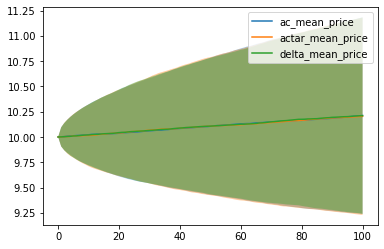

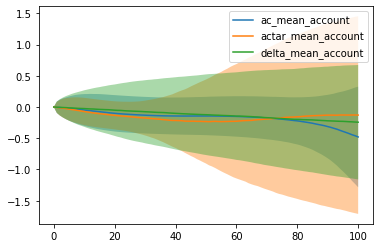

In [10]:
def plotprices(pricedict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        pricelist = pricedict[item]
        for price in zip(*pricelist):
            mp = np.mean(price)
            std = np.std(price)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_mean_price')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()
def plotaccounts(accountdict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        accountlist = accountdict[item]
        for account in zip(*accountlist):
            mp = np.mean(account)
            std = np.std(account)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_mean_account')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()
import matplotlib.pyplot as plt
plotprices(Prices, testlist)
plotaccounts(Accounts, testlist)

Next, we can see the final evaluation of our method -- The mean and std of the cumrewards and account value of these two methods. We first draw the histogram and give the statistics, given that the discount factor is 0.99.

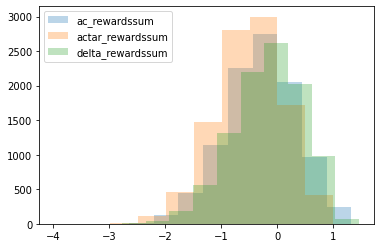

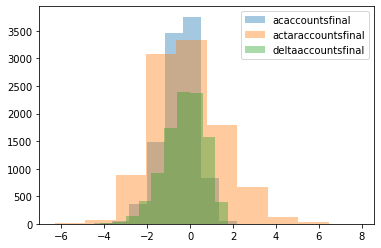

In [11]:
def histrewards(rewardsdict, testlist, disfac):
    for item in testlist:
        cumrewards = []
        rewardlist = rewardsdict[item]
        for reward_single in rewardlist:
            rewardsum = 0
            cumprodfac = 1
            for reward in reward_single:
                rewardsum += reward * cumprodfac
                cumprodfac *= disfac
            cumrewards.append(rewardsum)
        plt.hist(cumrewards, label = item + '_rewardssum', alpha = 0.3)
    plt.legend()
    plt.show()
def histaccounts(accountdict, testlist):
    for item in testlist:
        accountlist = accountdict[item]
        accarray = np.array(accountlist)
        plt.hist(accarray[:,-1], label = item + 'accountsfinal', alpha = 0.4)
    plt.legend()
    plt.show()
histrewards(Rewards, testlist, 0.99)
histaccounts(Accounts, testlist)

In [12]:
import pandas as pd
def statistics_rewards(rewardsdict, testlist, disfac):
    df = pd.DataFrame(index = ['mean', 'std'])
    for item in testlist:
        cumrewards = []
        rewardlist = rewardsdict[item]
        for reward_single in rewardlist:
            rewardsum = 0
            cumprodfac = 1
            for reward in reward_single:
                rewardsum += reward * cumprodfac
                cumprodfac *= disfac
            cumrewards.append(rewardsum)
        df[item] = [np.mean(cumrewards), np.std(cumrewards)]
    return df
def statistics_accounts(accountdict, testlist):
    df = pd.DataFrame(index = ['mean', 'std'])
    for item in testlist:
        accountlist = accountdict[item]
        accarray = np.array(accountlist)
        df[item] = [ np.mean(accarray[:,-1]), np.std(accarray[:,-1]) ]
    return df

In [13]:
statistics_rewards(Rewards, testlist, 0.99)

,ac,actar,delta
mean,-0.301628,-0.500303,-0.161711
std,0.629065,0.606036,0.619009


In [14]:
statistics_accounts(Accounts, testlist)

,ac,actar,delta
mean,-0.479528,-0.129074,-0.243149
std,0.805931,1.583017,0.916297


We can see that if we use cum rewards as the evaluation method, the delta hedging remains the best. But if we use the account's final value as the evaluation method, the actarget have the highest mean, yet with higher std. We can plot their actions mean and std to see their changes:

In [15]:
def plotactions(accountdict, testlist):
    for item in testlist:
        meanps = []
        stdps = []
        accountlist = accountdict[item]
        for account in zip(*accountlist):
            mp = np.mean(account)
            std = np.std(account)
            meanps.append(mp)
            stdps.append(std)
        plt.plot(meanps, label = item + '_actions')
        plt.fill_between(x = range(len(meanps)), y1 = [x-y for x, y in zip(meanps, stdps)], y2 = [x + y for x, y in zip(meanps, stdps)],alpha = 0.4)
    plt.legend()
    plt.show()

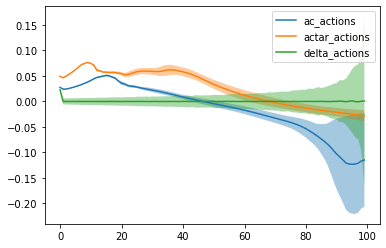

In [16]:
plotactions(actions, testlist)

We can see that compared to the delta hedging method, the RL methods give larger changes of holding position, but the variance of action is not necessarily greater: The results of actar network actually only fluctuate a bit.

### Conclusion and Discussions
From the experiment, we can see that compared to delta hedging, the actarget network tends to give a higher account value, yet higher volatility and higher changing rate on stock account. Compared to the paper 'Deep Hedging of Derivatives Usingp
Reinforcement Learning', we ended up with a poorer performance. The reason for our less-than-optimal results may be the fact that they considered the volatility of the action, yet we only considered the mean. How to take the risk parameters into account, rather than just focusing on the mean square error, may be the key to applying reinforcement learning methods to hedging problems.

### Reference
- Jay Cao, Jacky Chen, John Hull, Zissis Poulos (2019) Deep Hedging of Derivatives Using Reinforcement Learning
- LORIS CANNELLI, GIUSEPPE NUTI, MARZIO SALA, AND OLEG SZEHR  HEDGING USING REINFORCEMENT LEARNING:
CONTEXTUAL k-ARMED BANDIT VERSUS Q-LEARNING
- http://gym.openai.com
- https://spinningup.openai.com/en/latest/
